In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import seaborn as sns 

In [5]:
# Confusion Matrix

"""
                                Actual
           --------------------------------------------------
           |            1           |       0               |
           --------------------------------------------------
           | 1  | True Positive(TP)     False Positive(FP)  |
Predicted  |----| ----------------------------------------- |
           | 0  | False Negative(FN)    True Negative(TN)   |
           --------------------------------------------------

"""

In [ ]:
"""

    [[73 , 7]
     [4 , 144]]

"""

# Accuracy = ( TP + TN ) / (TP + FP + FN + TN ) = 217 / 228

# Precision = TP / (TP + FP) = 73 / 80

# Recall = TP / (TP + FN) = 73 / 77

In [2]:
# Support Vector Machines

dataset = pd.read_csv("../../Data/Social_Network_Ads.csv")

X = dataset.iloc[: , [2,3]].values
y = dataset.iloc[: , -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear' , random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


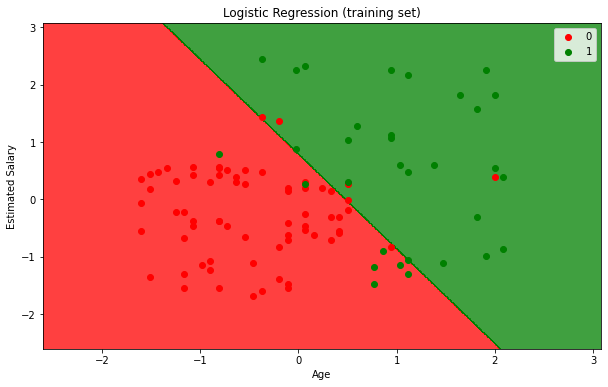

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [9]:
from scipy import stats
import seaborn as sns; sns.set()

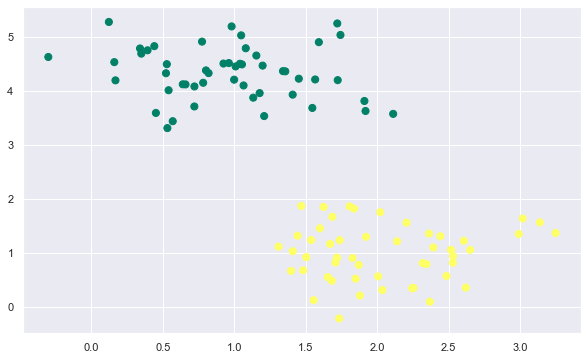

In [10]:
from sklearn.datasets import make_blobs
X , y = make_blobs(n_samples = 100 , centers = 2 , random_state = 0 , cluster_std = 0.5)

plt.scatter(X[:, 0], X[: , 1] , c = y , s = 50 , cmap= "summer" )
plt.show()

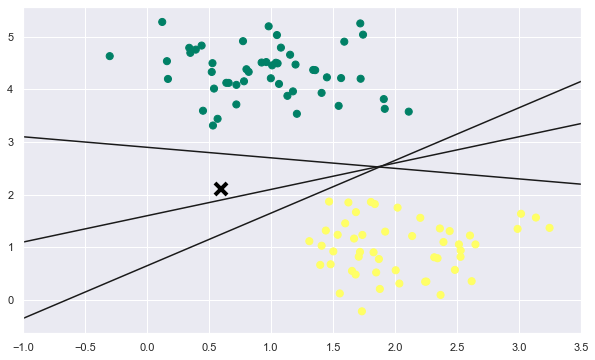

In [12]:
xfit = np.linspace(-1, 3.5)
plt.plot([0.6] , [2.1] , 'x' , color="black" , markeredgewidth = 4 , markersize = 12)
plt.scatter(X[:, 0], X[: , 1] , c = y , s = 50 , cmap= "summer" )

for m, b in [(1, 0.65) , (0.5, 1.6) , (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

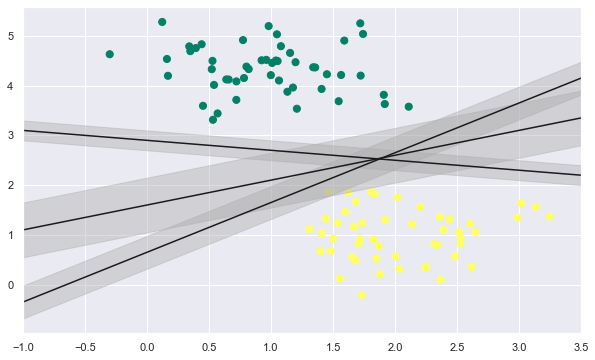

In [13]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[: , 1] , c = y , s = 50 , cmap= "summer" )

for m, b, d in [(1, 0.65, 0.33) , (0.5, 1.6, 0.55) , (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit , yfit, "-k")
    plt.fill_between(xfit , yfit - d , yfit + d , edgecolor = 'none' , color="#AAAAAA" , alpha = 0.4)

plt.xlim(-1, 3.5)
plt.show()

In [15]:
from sklearn.svm import SVC
model = SVC(kernel='linear' , C = 1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

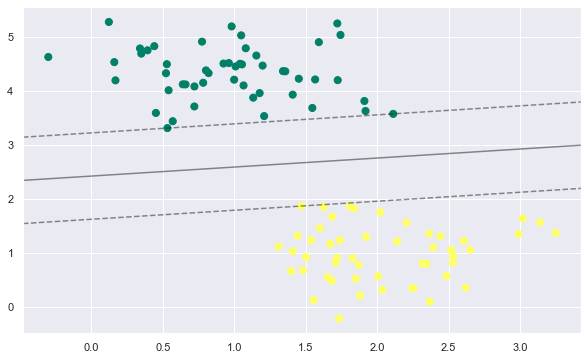

In [27]:
def decision_function(model , ax=None , plot_support = True):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0] , xlim[1] , 30)
    y = np.linspace(ylim[0] , ylim[1] , 30)

    Y , X = np.meshgrid(y , x)

    xy = np.vstack([X.ravel() , Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X , Y ,P , colors = "k" , levels = [-1, 0 , 1 ] , alpha = 0.5 , linestyles = ['--','-','--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:,0] , model.support_vectors_[:,1], s = 300 , linewidth=1 , facecolors = 'none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[: , 1] , c = y , s = 50 , cmap= "summer" )
decision_function(model)

In [18]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])